# Space Station Design
## PH 211 Lab
### Feburary 28, 2021
### Zachary Bochanski

This notebook provides documentation supporting the design of a trash can style space colony. The key features focused on in this design are the size and ritation rate of this colony to practically simulate a feeling of gravit (normal force) acting on a human living in the colony.

### Dependencies

`numpy` math library contains many tools used in this lab for computations and analysis.
`matplotlib` plotting library is used to create visual aids for this lab

The following cell contains these imports.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as ply

### Tools

Circular motion:

.$$\large \sum_{all} F_{radial} = m\frac{v^2}{r}$$



### Station Requirements

1. 1 g acceleration felt
2. 20m above the floor acceleration must be 95% of 1 g
3. $.8km^2$ area
4. period of rotation > 30s
5. location at L4 or L5 (Lagrange points) in earth - moon system

### Station Mock-up

A sketch of the proposed space can to visualize what needs to happen

Note:

- axes of rotation
- powered rotation (intended rotation axis)
- area requirements
- height and radius
- intended floor




![mock_up](https://github.com/ztbochanski/physics-211/raw/main/images/lab7_design.jpg)

### Free Body Diagram

A sketch of the forces important to meeting the design requirements

Note:
- direction of acceleration and force
- velocity vector
- normal force
- axis of rotation at center of circle, radius

![lab7_fbd](https://github.com/ztbochanski/physics-211/raw/main/images/lab7_fbd.jpg)

### Radius vs. Apparent Gravity Model

Calculating the intended gravity "felt" at various radii by controlling the period.

Constants:
- `GRAVITY` desired simulated, "felt" gravity in the drum
- `PERIOD` seconds (s) to complete on rotation of the drum

Speed of edge:
- The drum rotates at a constant speed, the edge's speed is circumference (distance traveled), divided by period (time for one rotation).
- The speed will change depending on the desired period and radius.  
.$$ Speed_r = \frac{2\pi r}{PERIOD} $$

Apparent gravity:
- The apparent gravity is the acceleration towards the center of rotation; the force of acceleration in a circular motion.  
.$$ Apparent_g = \frac{speed_r^2}{r} $$


In [132]:
# Constants
GRAVITY = 9.81 # m/s^2

#velocity_edge = 22. # in m/s 
PERIOD = 41 # in s

# Min and max possible radii (m)
max_radius = 600
min_radius = 50

# X values generate
num_points = 200
range_radii = np.linspace(min_radius, max_radius, num_points)

# Speed of edge and simulated gravity 
speed_r = 2.*np.pi*range_radii/PERIOD
apparent_gravity = speed_r**2/range_radii

### Plot Radii vs. Apparent Gravity

The plot shows the relationship between the radius of the habitat drum and the apparent gravity felt at the edge. The larger the radius the greater the acceleration towards the center of the station a constant speed.

The intersection point is when the acceleration toward the center of the drum simulates earths gravity (1g).

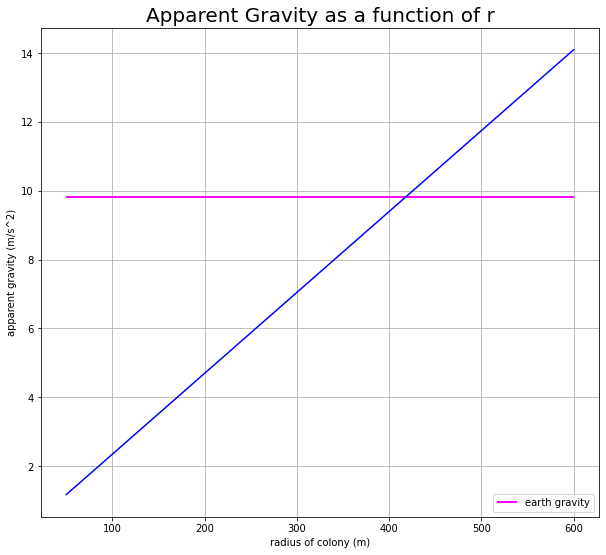

In [133]:
fig1, ax1 = plt.subplots()

# plot the basic velocity model
ax1.plot(range_radii, apparent_gravity, color = 'blue')

# draw a horizontal or vertical line across the plot to show some feature
ax1.hlines(9.81, min_radius, max_radius,
         color = 'magenta', linestyle = '-',
         linewidth = 2., label = "earth gravity")

# a more explicit way to set labels
plt.xlabel('radius of colony (m)', fontsize = 10)
plt.ylabel('apparent gravity (m/s^2)', fontsize = 10)
plt.title('Apparent Gravity as a function of r', fontsize = 20)

fig1.set_size_inches(10, 9)
ax1.grid()
plt.legend(loc= 4)

plt.show()

### Maintain Simulated 1g Requirement

A design requirement specifies that 20 (m) from the edge of the ring must be within 95% of simulated 1g.

Modify the model to visualize an "inner" ring that is 20m closer the the axis of rotating.

In [134]:
# work out what's happening 20 m off the ground
# need to be careful that the minimum radius is greater than the 20 m
# or there will be a divide by 0 error.

# inner_radii = []
# for i in range(len(range_radii)):
#     inner_radii.append(range_radii[i]-20)

inner_radii = range_radii-20

inner_speed = 2*np.pi*inner_radii/PERIOD
apparent_inner_gravity = inner_speed**2/inner_radii


### Plot Inner Boundry

Adding the modified model to the plot. It shows how at a smaller radius there is less circular acceleration than a larger radius. The horizontal line less than earths gravity is the range that the "inner" ring must be within.

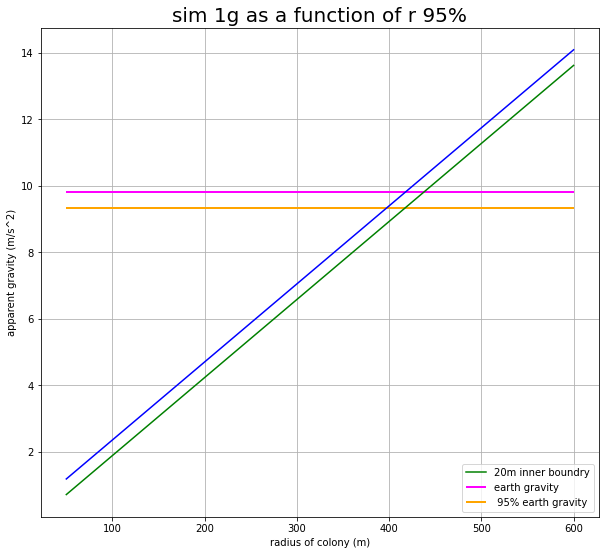

In [135]:

fig2, ax2 = plt.subplots()

# plot the basic velocity model
ax2.plot(range_radii, apparent_gravity, color = 'blue')
ax2.plot(range_radii, apparent_inner_gravity, color = 'green', label = "20m inner boundry")

# draw a horizontal or vertical line across the plot for target accelerations
ax2.hlines(9.81, min_radius, max_radius,
         color = 'magenta', linestyle = '-',
         linewidth = 2., label = "earth gravity")
ax2.hlines(0.95*9.81, min_radius, max_radius,
         color = 'orange', linestyle = '-',
         linewidth = 2., label = " 95% earth gravity")

# a more explicit way to set labels
plt.xlabel('radius of colony (m)', fontsize = 10)
plt.ylabel('apparent gravity (m/s^2)', fontsize = 10)
plt.title('sim 1g as a function of r 95%', fontsize = 20)

fig2.set_size_inches(10, 9)
ax2.grid()
plt.legend(loc= 4)

plt.show()

### Zoom The Plot

Taking a more detailed look at what the models present.

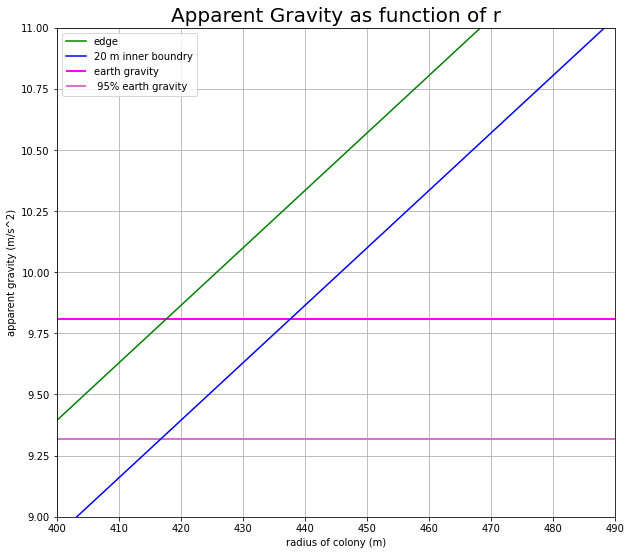

In [136]:
fig3, ax3 = plt.subplots()

# plot the basic projectile model
ax3.plot(range_radii, apparent_gravity,
            color = 'green',label = "edge")
ax3.plot(range_radii, apparent_inner_gravity,
            color = 'blue',label = "20 m inner boundry")

# draw a horizontal or vertical line across the plot to show some feature
ax3.hlines(9.81, min_radius,max_radius,
         color = 'magenta', linestyle = '-',
         linewidth = 2., label = "earth gravity")
ax3.hlines(0.95*9.81, min_radius,max_radius,
         color = 'orchid', linestyle = '-',
         linewidth = 2., label = " 95% earth gravity")

# a more explicit way to set labels
plt.xlabel('radius of colony (m)', fontsize = 10)
plt.ylabel('apparent gravity (m/s^2)', fontsize = 10)
plt.title('Apparent Gravity as function of r', fontsize = 20)

# zoom in!!
ax3.set_xlim([400,490])
ax3.set_ylim([9,11])

fig3.set_size_inches(10, 9)
ax3.grid()
plt.legend(loc= 2)

plt.show()

### Dimension Calculations

#### Radius
Finding radius that is within 1g and 95% of 1g requires finding the minimum radius that fits both models. According to the models above it appears that a station needs a radius of:

- `417` m

#### Height (longitudinal axis)
To build a practicle station that is restricted to the required $.8km^2$ we need to maximize dimension (h) of the drum. The final dimensions of a drum can be found with $A=2\pi r h + 2\pi r^2$. Solving for h, h = 542m.

.$$ A = 2\pi r h + 2\pi r^2 $$

.$$ 2\pi r h = A - 2\pi r^2 $$

.$$ h = \frac{A - 2 r^2}{2 r} $$

---

.$$ m^2 = .8km^2 \cdot 1\cdot10^6 $$

.$$ 800000m^2 = .8km^2 \cdot 1\cdot10^6 $$

.$$ h = \frac{A - 2 r^2}{2 r} $$

.$$ h = \frac{800000m^2 - 2 \cdot 417m^2}{2 \cdot 417m} $$

.$$ h = 542m $$

### Ball Drop

![ball_drop](https://github.com/ztbochanski/physics-211/raw/main/images/lab7_ball.jpg)

While standing on the floor of the rotating drum a dropped ball is subjected to the circular acceleration. From the perspective of the person dropping the ball it will appear to drop straight down to the floor because both the person and ball are traveling at the same velocity. There is a slight perspective shift because the person changes direction but the ball does not change direction because it is no longer in contact with the system that is moving in a circle. So the ball would hit the floor on a different area that it would normally on earth. It seems the main reason for this is because gravity can act on objects without touching them, so the ball on earth would constantly accelerate toward the center of earth, while in the space colony, the ball would continue moving through space how it was last interected with by the contact forces of the system (the last contact from the system being the persons hand).

#### Ball Drop Time

.$$ d = \vec{v_i}t + \frac{1}{2}at^2 $$

.$$ t^2 = \frac{2d(m)}{a(\frac{m}{s^2})} $$

.$$ t = .45s $$

The difference between earth and a rotating drum would result in the same times to contacting the "floor" if the drum accelerating matches gravity, but the ball would appear to "rotate" while in space in a drum. This is best visualized in the free body diagram above where the ball continues it's path once it's dropped.

### Earth vs Space: thoughts on stability

1. Would the human vestibular system get disrupted while the body is constantly spinning leading to dizzyness, illusions etc... or would it only be affected near another gravitational force like the earth. So maybe only rotate the can away from large gravitational influences...?

2. How does the stability of a massive spinning drum behave in space. If there is an imbalence or a suddenly strange mass redistribution, etc... would the drum become unstable, tumble, or rotate wierd and possible break apart or just throw humans and gear around indefinetly. Seems like there would need to be some sort of strict weight and balance protocol.



### Reflection

As usual it's really fun coding out the physics concepts in python, it may take longer but I think it helps by really having to think about the problem. Having organized jupyter notebooks is also really awesome for looking back at stuff.  